<a href="https://colab.research.google.com/github/Sowmyadevalla2005/Theme-based/blob/main/TB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

**Importing the Dependencies**


In [2]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords #Natural language tool kit
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Printing stop words in english

In [4]:
print(stopwords.words('english')) # doesnot add any meaning to our textual data ML model doesnot require these words

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

Loading the data from csv file to pandas data frame

In [5]:
twitter_true = pd.read_csv('/content/DataSet_Misinfo_TRUE.csv')

Checking the number of rows and columns

In [6]:
twitter_true.shape

(34975, 2)

Printing first 5 rows

In [7]:
twitter_true.head()

,Unnamed: 0,text
0,0,The head of a conservative Republican faction ...
1,1,Transgender people will be allowed for the fir...
2,2,The special counsel investigation of links bet...
3,3,Trump campaign adviser George Papadopoulos tol...
4,4,President Donald Trump called on the U.S. Post...


Naming the columns and reading the dataset again

In [8]:
column_names=['Id','Text']
twitter_true = pd.read_csv('/content/DataSet_Misinfo_TRUE.csv',names=column_names)

In [9]:
twitter_true.shape

(34976, 2)

In [10]:
twitter_true.head()

,Id,Text
0,NaN,text
1,0.0,The head of a conservative Republican faction ...
2,1.0,Transgender people will be allowed for the fir...
3,2.0,The special counsel investigation of links bet...
4,3.0,Trump campaign adviser George Papadopoulos tol...


**Counting number of missing values in the data set **

In [11]:
twitter_true.isnull().sum()

,0
Id,1
Text,29


In [12]:
twitter_true.dropna(inplace=True) #removes rows containing NaN values


after that



In [13]:
twitter_true.isnull().sum()

,0
Id,0
Text,0


Checking the distribution of target column

In [14]:
twitter_true['Id'].value_counts()

,count
Id,
34974.0,1
0.0,1
34935.0,1
34936.0,1
34937.0,1
...,...
5.0,1
6.0,1
7.0,1


In [16]:
twitter_fake = pd.read_csv('/content/DataSet_Misinfo_FAKE (1).csv')

In [20]:
twitter_fake.shape

(43642, 2)

In [17]:
twitter_fake.head()

,Unnamed: 0,text
0,0,Donald Trump just couldn t wish all Americans ...
1,1,House Intelligence Committee Chairman Devin Nu...
2,2,"On Friday, it was revealed that former Milwauk..."
3,3,"On Christmas day, Donald Trump announced that ..."
4,4,Pope Francis used his annual Christmas Day mes...


In [18]:
column_names=['Id','Text']
twitter_fake = pd.read_csv('/content/DataSet_Misinfo_FAKE (1).csv',names=column_names)

In [19]:
twitter_fake.shape

(43643, 2)

In [20]:
twitter_fake.head()

,Id,Text
0,NaN,text
1,0.0,Donald Trump just couldn t wish all Americans ...
2,1.0,House Intelligence Committee Chairman Devin Nu...
3,2.0,"On Friday, it was revealed that former Milwauk..."
4,3.0,"On Christmas day, Donald Trump announced that ..."


In [21]:
twitter_fake.isnull().sum()

,0
Id,1
Text,0


In [22]:
twitter_fake.dropna(inplace=True)

In [23]:
twitter_fake.isnull().sum()

,0
Id,0
Text,0


In [24]:
twitter_fake['Id'].value_counts()

,count
Id,
44426.0,1
0.0,1
1.0,1
2.0,1
3.0,1
...,...
29.0,1
30.0,1
31.0,1


In [25]:
twitter_true.describe()
twitter_fake.describe()

,Id
count,43642.000000
mean,22293.806173
std,12889.800176
min,0.000000
25%,10910.250000
50%,22450.500000
75%,33472.750000
max,44426.000000


Text Cleaning: This is crucial for text analysis. Here's a common sequence:


In [26]:
import re  # For regular expressions

def clean_text(Text):
    Text = str(Text).lower()  # Lowercase
    Text = re.sub(r'\[.*?\]', '', Text)  # Remove Text in square brackets
    Text = re.sub(r'https?://\S+|www\.\S+', '', Text)  # Remove URLs
    Text = re.sub(r'<.*?>+', '', Text)  # Remove HTML tags
    Text = re.sub(r'[%s]' % re.escape(string.punctuation), '', Text)  # Remove punctuation
    Text = re.sub(r'\n', '', Text)  # Remove newline characters
    Text = re.sub(r'\w*\d\w*', '', Text)  # Remove words containing numbers
    return Text

import string

twitter_true['Text'] = twitter_true['Text'].apply(clean_text)
twitter_fake['Text'] = twitter_fake['Text'].apply(clean_text)


REMOVING STOP WORDS

In [27]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')  # Download the stopwords list if you haven't already

stop_words = set(stopwords.words('english'))

def remove_stopwords(Text):
    words = Text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

twitter_true['Text'] = twitter_true['Text'].apply(remove_stopwords)
twitter_fake['Text'] = twitter_fake['Text'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Stemming/Lemmatization: Reduce words to their root form. Lemmatization is generally preferred.**

In [28]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')  # Download WordNet if you haven't already

lemmatizer = WordNetLemmatizer()

def lemmatize_text(Text):
    words = Text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

twitter_true['Text'] = twitter_true['Text'].apply(lemmatize_text)
twitter_fake['Text'] = twitter_fake['Text'].apply(lemmatize_text)


#Downloads WordNet: Downloads the WordNet lexical database, which is used for lemmatization.
#Lemmatizes Text: Applies lemmatization to each word in the text. Lemmatization reduces words to their dictionary base form (lemma).

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [29]:
twitter_true['label'] = 'true'
twitter_fake['label'] = 'fake'

all_news = pd.concat([twitter_true, twitter_fake], ignore_index=True)




In [30]:
all_news.shape

(78588, 3)

In [31]:
all_news.head()

,Id,Text,label
0,0.0,head conservative republican faction u congres...,true
1,1.0,transgender people allowed first time enlist u...,true
2,2.0,special counsel investigation link russia pres...,true
3,3.0,trump campaign adviser george papadopoulos tol...,true
4,4.0,president donald trump called u postal service...,true


Exploratory Data Analysis (EDA) After Cleaning

**Label Distribution: Check the balance of 'true' and 'fake' labels.**

In [32]:
print("\nLabel Distribution:")
all_news['label'].value_counts()



Label Distribution:


,count
label,
fake,43642
true,34946


# **Text *bold text* Length Analysis: Look at the distribution of text lengths (number of words) for true vs. fake news. This can sometimes reveal differences.**



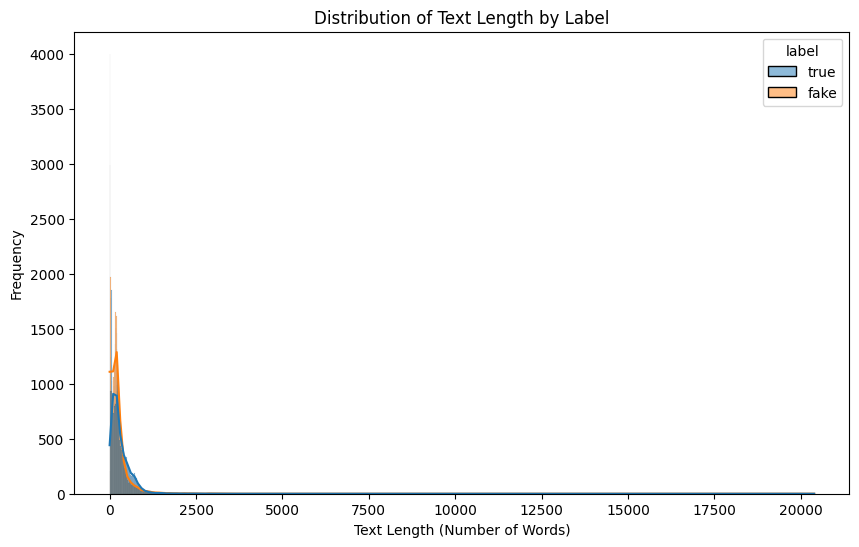

In [33]:
all_news['text_length'] = all_news['Text'].apply(lambda x: len(x.split()))

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=all_news, x='text_length', hue='label', kde=True)
plt.title('Distribution of Text Length by Label')
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()


**Word Frequency Analysis: Identify the most frequent words in true vs. fake news. This can give you insights into the topics and writing styles**

In [34]:
from collections import Counter

def top_words(Text, n=10):
    words = Text.split()
    return Counter(words).most_common(n)

twitter_true = ' '.join(all_news[all_news['label'] == 'true']['Text'])
twitter_fake = ' '.join(all_news[all_news['label'] == 'fake']['Text'])

print("\nTop 10 Words in True News:", top_words(twitter_true))
print("Top 10 Words in Fake News:", top_words(twitter_fake))



Top 10 Words in True News: [('said', 164650), ('trump', 73866), ('mr', 70255), ('state', 58695), ('would', 55936), ('u', 50623), ('”', 46299), ('—', 44593), ('president', 43664), ('year', 39366)]
Top 10 Words in Fake News: [('trump', 96043), ('u', 50616), ('people', 47768), ('said', 46766), ('one', 44679), ('would', 43038), ('state', 42006), ('clinton', 41209), ('president', 36844), ('time', 33411)]


Stemming is the process of reducing a word to its root word

EX: actor,actress,acting=act

In [35]:
port_stem = PorterStemmer()

In [36]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from joblib import Parallel, delayed
import nltk

# Download stopwords if not already done
nltk.download('stopwords')

# Preload stopwords and stemmer
stop_words = set(stopwords.words('english'))
port_stem = PorterStemmer()

def stemming(text):
    # Remove non-alphabetic characters and convert to lowercase
    stemmed_content = re.sub('[^a-zA-Z]', ' ', text).lower()
    # Split into words and stem, excluding stopwords
    stemmed_content = [port_stem.stem(word) for word in stemmed_content.split() if word not in stop_words]
    return ' '.join(stemmed_content)

# Apply stemming with parallel processing
all_news['stemmed_content'] = Parallel(n_jobs=-1)(delayed(stemming)(text) for text in all_news['Text'])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


removing of suffixes and prefixes from the word

In [37]:
all_news.head()

,Id,Text,label,text_length,stemmed_content
0,0.0,head conservative republican faction u congres...,true,444,head conserv republican faction u congress vot...
1,1.0,transgender people allowed first time enlist u...,true,235,transgend peopl allow first time enlist u mili...
2,2.0,special counsel investigation link russia pres...,true,266,special counsel investig link russia presid tr...
3,3.0,trump campaign adviser george papadopoulos tol...,true,227,trump campaign advis georg papadopoulo told au...
4,4.0,president donald trump called u postal service...,true,488,presid donald trump call u postal servic frida...


In [38]:
print(all_news['stemmed_content'])

0        head conserv republican faction u congress vot...
1        transgend peopl allow first time enlist u mili...
2        special counsel investig link russia presid tr...
3        trump campaign advis georg papadopoulo told au...
4        presid donald trump call u postal servic frida...
                               ...                        
78583    usa want divid syria great britain franc germa...
78584    ukrainian coup detat cost u noth nearli noth c...
78585    european parliament falsifi histori declar mol...
78586    european parliament falsifi histori declar mol...
78587    lead fsb offic segey beseda said summit intell...
Name: stemmed_content, Length: 78588, dtype: object


In [39]:
print(all_news['label'])

0        true
1        true
2        true
3        true
4        true
         ... 
78583    fake
78584    fake
78585    fake
78586    fake
78587    fake
Name: label, Length: 78588, dtype: object


In [40]:
X= all_news['stemmed_content'].values
Y= all_news['label'].values

In [41]:
print(X)

['head conserv republican faction u congress vote month huge expans nation debt pay tax cut call fiscal conserv sunday urg budget restraint keep sharp pivot way among republican u repres mark meadow speak cb face nation drew hard line feder spend lawmak brace battl januari return holiday wednesday lawmak begin tri pa feder budget fight like link issu immigr polici even novemb congression elect campaign approach republican seek keep control congress presid donald trump republican want big budget increas militari spend democrat also want proport increas nondefens discretionari spend program support educ scientif research infrastructur public health environment protect trump administr alreadi will say go increas nondefens discretionari spend percent meadow chairman small influenti hous freedom caucu said program democrat say enough need give govern pay rais percent fiscal conserv see rational eventu run peopl money said meadow among republican vote late decemb parti debtfinanc tax overhau

In [42]:
print(Y)

['true' 'true' 'true' ... 'fake' 'fake' 'fake']


Splitting the data in to training and testing data


X_train contains all my training datatweets  and corresponding stored in y_train and x_test the target in y_test

Stratify generally i want equal distribution of 0 and 1 if in the training data if the proportion of data is 50 % then it should be same in test data

equal proportion of classes in both train and test data


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2) #20 % go to testing x_test data
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(62870,) (15718,)
(62870,) (15718,)


In [44]:
print(X.shape)

(78588,)


In [45]:
print(X_train)

['alabama senat candid roy moor deni romant pursu teenag young bombshel report woman accus moor told washington post age romant pursu themon woman leigh corfman told post year old moor took shirt pant remov cloth corfman told post moor touch bra underp say guid hand touch underwear outspoken social conserv said statement four woman quot washington post lie garbag definit fake news intent defam moor saidform white hous advis stephen bannon help moor trounc establish favorit luther strang septemb republican primari presid trump warn moor less electablemoor current close race democrat doug jone ahead dec elect washington examinerstephani mccrummen report cowrot washington post hit piec judg roy moor appar histori fake thing like fake check instanc accord antitrump public red state mccrummen work washington post mani consid fake news use mulitpl unnam sourc attempt tie presid trump russian crimin record involv write fake checkm mccrummen rather interest crimin histori public crimin record 

In [46]:
print(X_test)

['kid want use word racist sexist even know talk like chri rock larri cabl guy jerri seinfeld avoid show colleg campu talk espn colin cowherd thursday comedian reveal colleg kid today polit correct hear time seinfeld said herd colin cowherd play colleg hear lot peopl tell go near colleg pc seinfeld say teen collegeag kid understand mean throw around certain politicallycorrect term want use word racist sexist prejudic said know f k talk funnyman went recount convers wife daughter belief prove point wife say well know next coupl year think mayb go want hang around citi weekend see boy seinfeld recal know daughter say say sexist point flack comedian loui ck receiv controversi appear saturday night live last month prove seinfeld point loui great gift worri thing said seinfeld scare make point either want say someth would say seinfeld stick cover topic feel make humor pc talk subject talk reason make funni said one make funni hear via entertain weekli'
 'rusia mejora el clima para hacer neg

Converting the textual data to numerical data


In [47]:
Vectorizer = TfidfVectorizer()

IT IS CONVERTING ALL THE WORDS IN TO NUMERICAL DATA

In [48]:
X_train = Vectorizer.fit_transform(X_train)
X_test = Vectorizer.transform(X_test)

In [49]:
print(X_train)

  (0, 5641)	0.041026702895392876
  (0, 199292)	0.021997275547829594
  (0, 32980)	0.022270761026316106
  (0, 190774)	0.09200216937579608
  (0, 142197)	0.3759842450142789
  (0, 56751)	0.026567502178283443
  (0, 189978)	0.10470895090637113
  (0, 177951)	0.06838679867800614
  (0, 219799)	0.03924119601094265
  (0, 252024)	0.027639304583346465
  (0, 26742)	0.045610650544431884
  (0, 185046)	0.048456492545376116
  (0, 247942)	0.06696612239506185
  (0, 1490)	0.024151031475606828
  (0, 226134)	0.051529449900935956
  (0, 242665)	0.12842688977006556
  (0, 171356)	0.12977198263178655
  (0, 4153)	0.030426076335112167
  (0, 222139)	0.06881825985355941
  (0, 124447)	0.060703559709518455
  (0, 47630)	0.13940660245147857
  (0, 250771)	0.02928350677365486
  (0, 156133)	0.05628242964323155
  (0, 226575)	0.022136538223020783
  (0, 202039)	0.04443333746149031
  :	:
  (62869, 240693)	0.26562305194304975
  (62869, 176536)	0.11283911471682953
  (62869, 164347)	0.060135443931867774
  (62869, 162303)	0.17221472

In [50]:
print(X_test)

  (0, 12371)	0.03132911356415269
  (0, 13879)	0.061396480341323396
  (0, 17118)	0.04313148188383747
  (0, 21840)	0.042144063618301496
  (0, 27903)	0.05052848694085692
  (0, 31572)	0.060473792431811266
  (0, 32792)	0.05803719611505758
  (0, 36169)	0.043734941883710216
  (0, 38905)	0.04975757434024737
  (0, 39819)	0.033165803148346315
  (0, 40212)	0.09375354518573607
  (0, 42670)	0.1348135573429828
  (0, 42786)	0.17879172305897298
  (0, 42791)	0.10168938676038825
  (0, 43219)	0.12974174190005347
  (0, 46969)	0.0443368909719548
  (0, 47136)	0.045020488615059834
  (0, 47860)	0.04698724965317615
  (0, 48966)	0.04587523455568357
  (0, 49315)	0.040332840053215635
  (0, 49461)	0.22888047358402253
  (0, 53392)	0.09423718572546931
  (0, 66508)	0.040373573350544846
  (0, 69448)	0.055214271865757315
  (0, 70777)	0.07485614125385857
  :	:
  (15717, 247369)	0.03251938306018866
  (15717, 247409)	0.012272451606355825
  (15717, 247574)	0.01230853560598052
  (15717, 247942)	0.024995433817250494
  (15717

Training the MACHINE LEARNING MODELS

lOgistic regression. classification model we can classify

In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000) #max_iter means maximum number of times
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

MODEL EVALUATION


In [56]:
 #accuracy score on the training data

 X_train_prediction = model.predict(X_train)
 training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
 print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9513281374264355


In [57]:
 #accuracy score on the testing data

 X_test_prediction = model.predict(X_test)
 testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
 print('Accuracy score of the testing data : ', testing_data_accuracy)

Accuracy score of the testing data :  0.935806082198753


when training data accuracy and testing data accuracy is very close to each other we can say that the model has performed well

we have cases when training data accuracy is more and testing data accuracy is less called as overfitting when training accuracy is 80 and testing is just 40/50

SAVING THE TRAINED MODEL

In [60]:
import pickle
file_name = 'trianed_model.sav'
pickle.dump(model, open(file_name, 'wb')) #writing in binary format


USING THE SAVED MODEL FOR FUTURE PREDICTIONS

In [61]:
#loading the saved model.
loaded_model = pickle.load(open('/content/trianed_model.sav','rb'))

In [63]:
x_new = X_test[3]
print(Y_test[3])
prediction = loaded_model.predict(x_new)
print(prediction)

fake
['fake']
